In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data


,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,...,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,...,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,...,Self-Employed,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707
11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data[data.isna().all(axis=1)]

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: ylabel='RiskScore'>

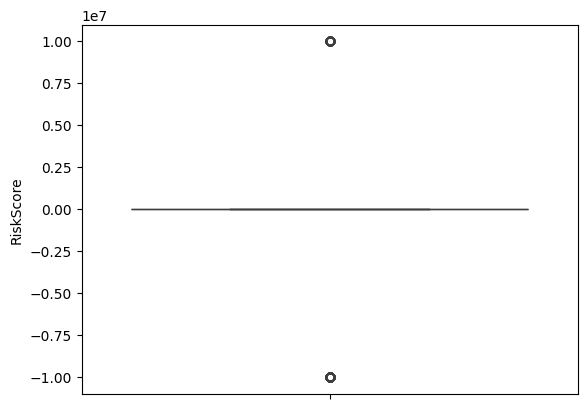

In [4]:
sns.boxplot(data=data['RiskScore'])

In [5]:
data.dropna(how='all', inplace=True) #для начала удалим пустые строки из выборки
data[data.isna().all(axis=1)]

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore


Как видно на боксплоте - в выборке наблюдается 2 аномальных значения - найдем их с помощью персентильного метода

In [6]:
Q1 = np.percentile(data['RiskScore'], 25)
Q3 = np.percentile(data['RiskScore'], 75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['RiskScore'] > upper_bound) | (data['RiskScore'] < lower_bound)]

print("количество выбросов: ", len(outliers))

outliers['RiskScore'].unique()

количество выбросов:  215


array([-9999999., 10000000.])

In [7]:
data = data[(data['RiskScore'] != -9999999.) & (data['RiskScore'] != 10000000.)] #удалим из выборки строки, в которых RiskScore соответствует аномальным значениям
data['RiskScore'].describe()

count    10272.000000
mean        48.358094
std         17.241456
min         14.841417
25%         32.722756
50%         44.195792
75%         65.124190
max         97.597249
Name: RiskScore, dtype: float64

<Axes: ylabel='RiskScore'>

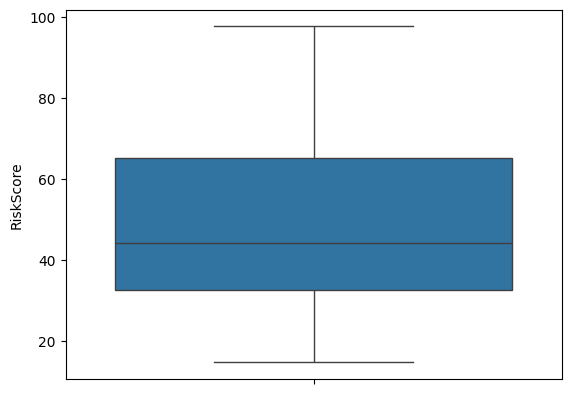

In [8]:
sns.boxplot(data=data['RiskScore'])

In [9]:
#выделим категориальные и скалярные признаки для отдельной дальнейшей обработки
num_cols = data.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
num_cols, categorical_cols

(['Age',
  'AnnualIncome',
  'CreditScore',
  'LoanAmount',
  'LoanDuration',
  'NumberOfDependents',
  'MonthlyDebtPayments',
  'CreditCardUtilizationRate',
  'NumberOfOpenCreditLines',
  'NumberOfCreditInquiries',
  'DebtToIncomeRatio',
  'BankruptcyHistory',
  'PreviousLoanDefaults',
  'PaymentHistory',
  'LengthOfCreditHistory',
  'SavingsAccountBalance',
  'CheckingAccountBalance',
  'TotalAssets',
  'TotalLiabilities',
  'MonthlyIncome',
  'UtilityBillsPaymentHistory',
  'JobTenure',
  'Experience',
  'NetWorth',
  'BaseInterestRate',
  'InterestRate',
  'MonthlyLoanPayment',
  'TotalDebtToIncomeRatio',
  'LoanApproved',
  'RiskScore'],
 ['ApplicationDate',
  'MaritalStatus',
  'HomeOwnershipStatus',
  'LoanPurpose',
  'EmploymentStatus',
  'EducationLevel'])

In [10]:
from sklearn.impute import KNNImputer 

In [11]:
imputer = KNNImputer(n_neighbors=5)

data[num_cols[:-1]] = imputer.fit_transform(data[num_cols[:-1]])# методом k ближайших соседей щаполняем пропуски скалярных величин

data[num_cols[:-1]].isna().sum()

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/1912375882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[num_cols[:-1]] = imputer.fit_transform(data[num_cols[:-1]])# методом k ближайших соседей щаполняем пропуски скалярных величин


Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
NumberOfDependents            0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
Experience                    0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyLoanPayment            0
TotalDebtToIncomeRatio        0
LoanApproved                  0
dtype: int64

In [12]:
#а категориальные признаки заполним модой - самое часто встречаемое значение в пандосовской серии
for feature in categorical_cols:
    most_frequent_value = data[feature].mode()[0]
    data[feature].fillna(most_frequent_value, inplace=True)
data[categorical_cols].isna().sum()

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/1278803169.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(most_frequent_value, inplace=True)
/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/1278803169.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature].fillna(most_frequen

ApplicationDate        0
MaritalStatus          0
HomeOwnershipStatus    0
LoanPurpose            0
EmploymentStatus       0
EducationLevel         0
dtype: int64

In [13]:
from sklearn.preprocessing import OneHotEncoder #закодируем данные с помощью one-hot-encoding


In [14]:
encoder = OneHotEncoder(sparse_output=False)

In [15]:
one_hot_encoder_data = encoder.fit_transform(data[categorical_cols[1:]])
one_hot_df = pd.DataFrame(one_hot_encoder_data, columns= encoder.get_feature_names_out(categorical_cols[1:]))
one_hot_df

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,...,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10268,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10269,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10270,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


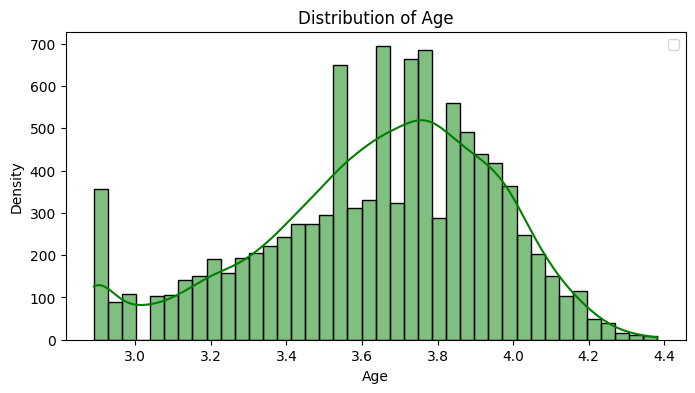

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


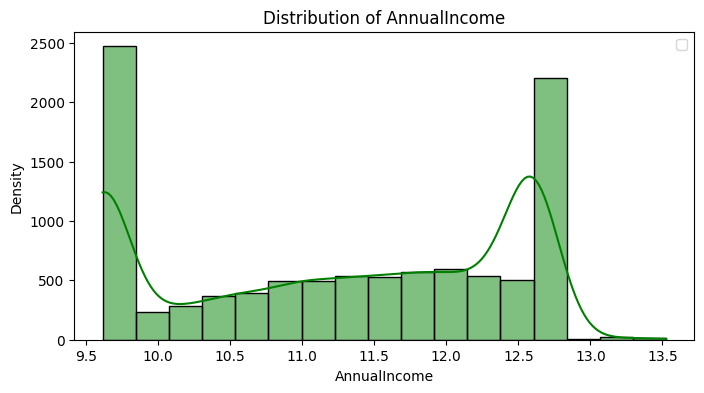

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


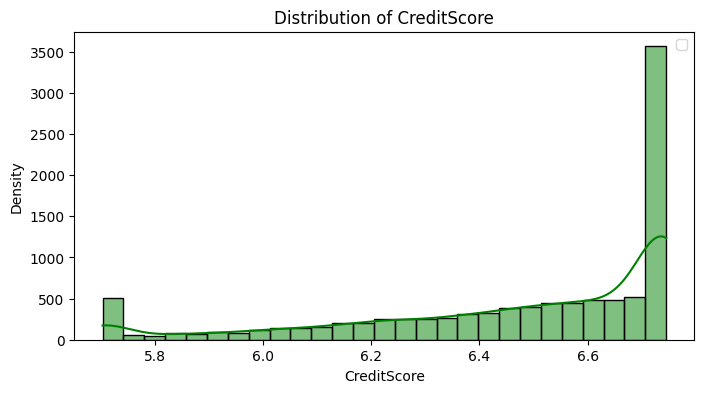

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


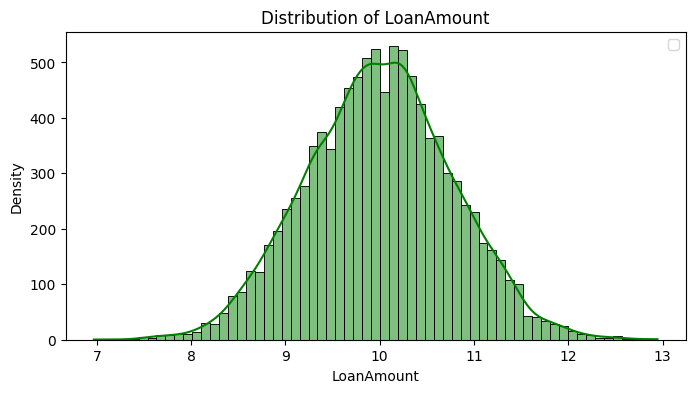

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


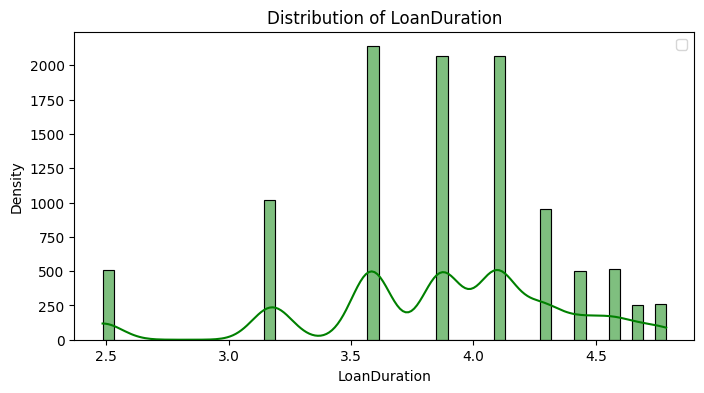

/Users/serzhan/Coding/Python/.venv/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


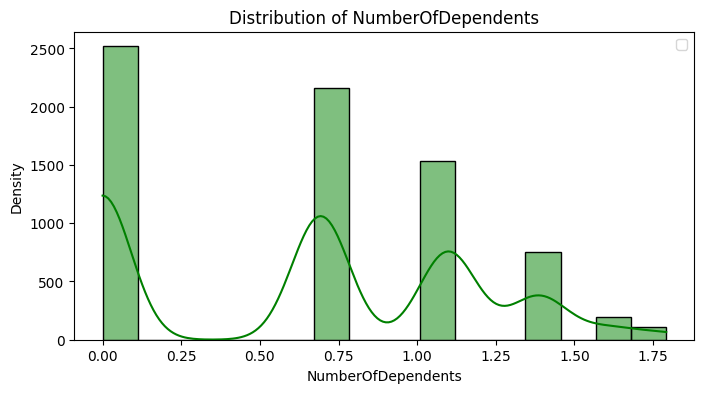

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


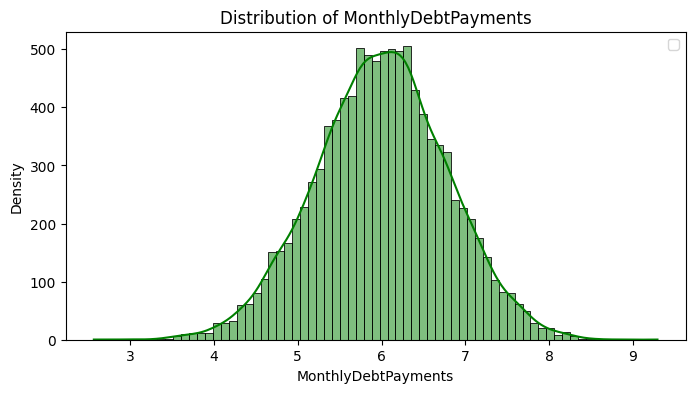

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


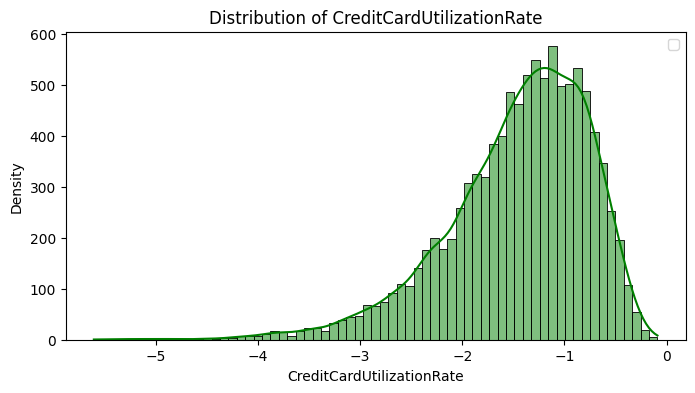

/Users/serzhan/Coding/Python/.venv/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


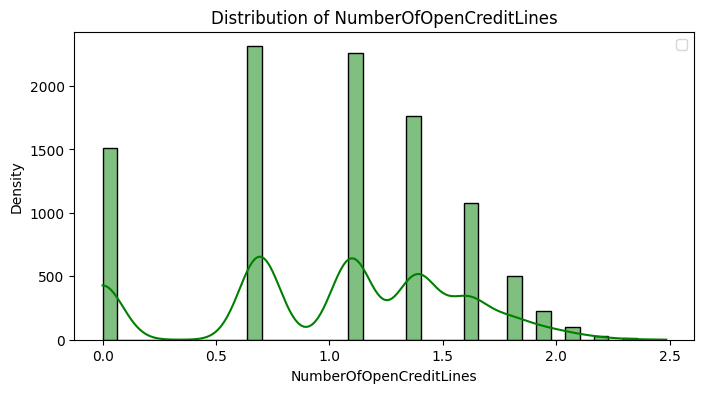

/Users/serzhan/Coding/Python/.venv/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


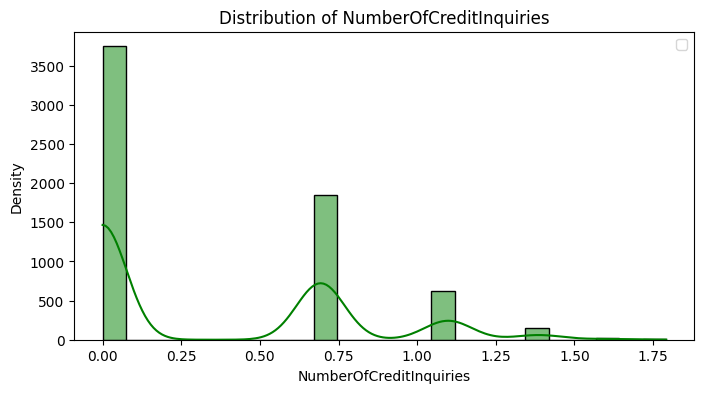

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


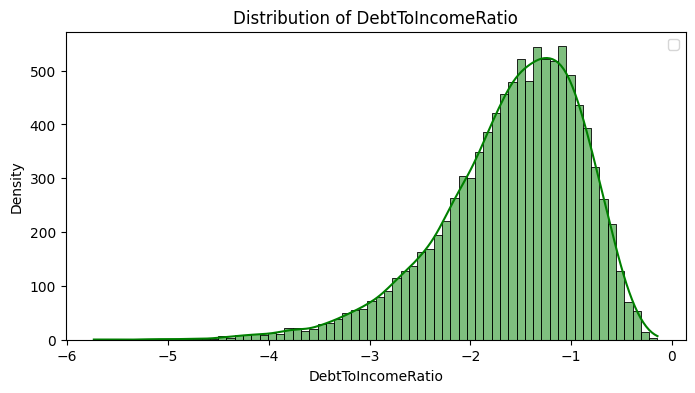

/Users/serzhan/Coding/Python/.venv/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


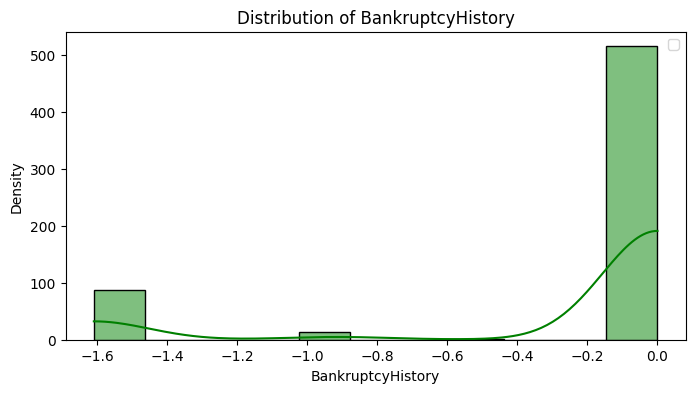

/Users/serzhan/Coding/Python/.venv/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


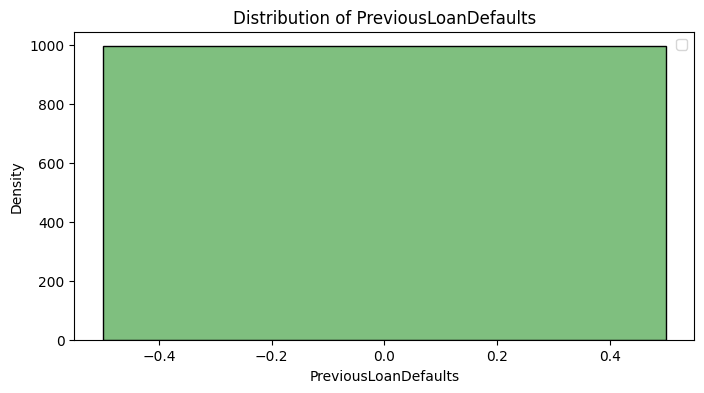

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


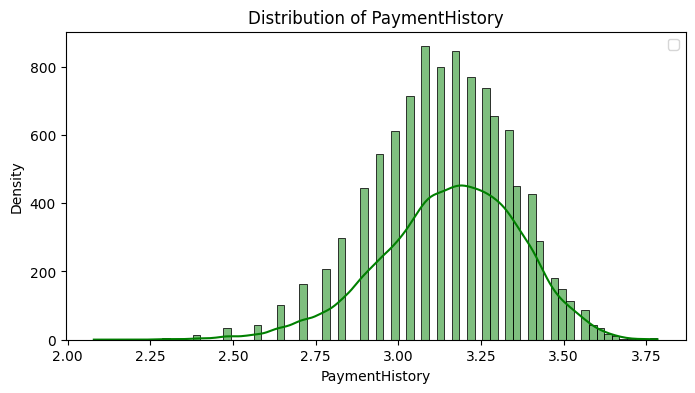

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


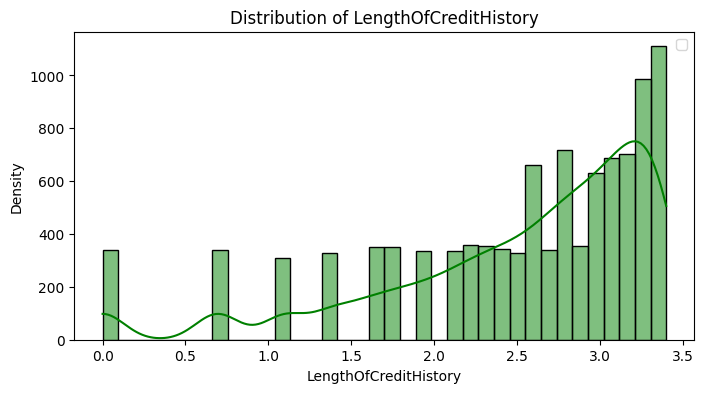

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


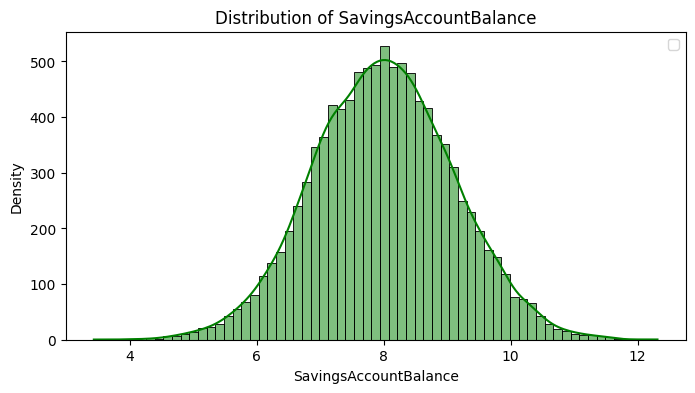

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


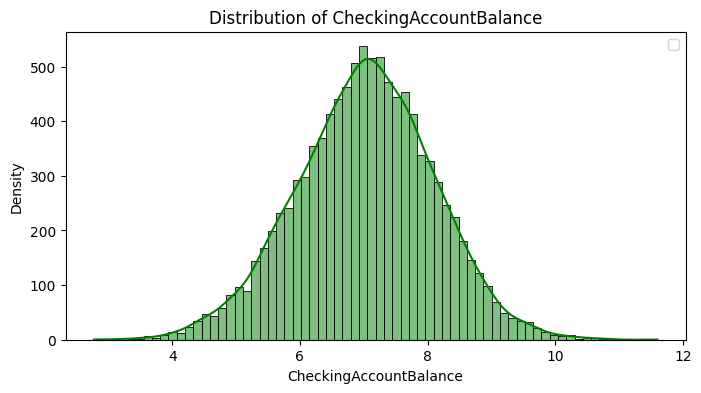

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


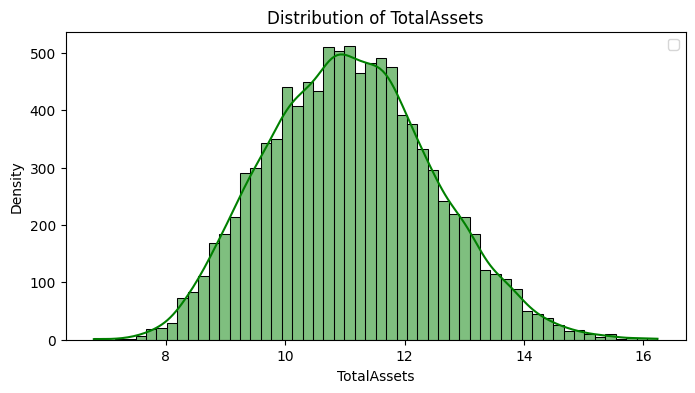

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


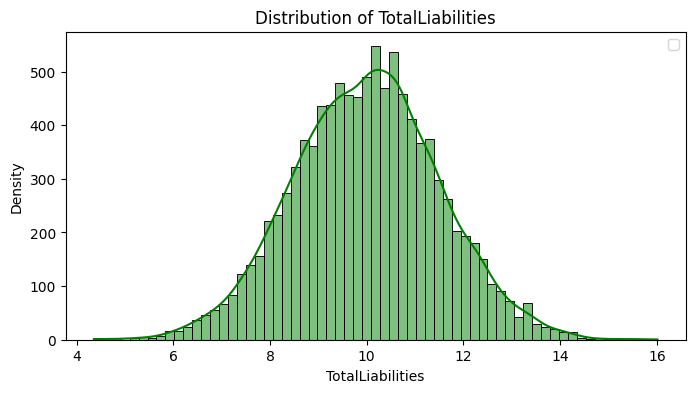

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


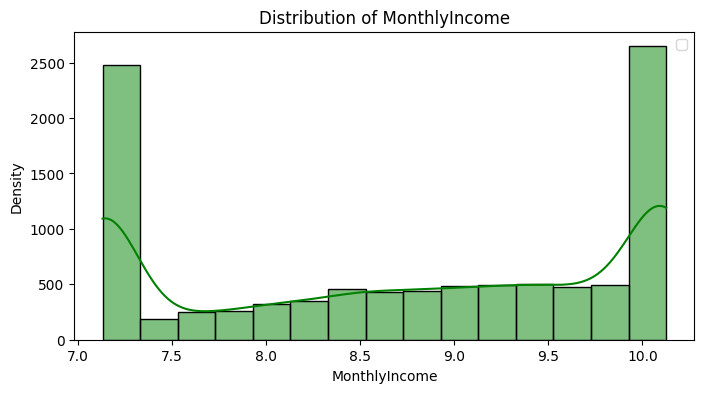

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


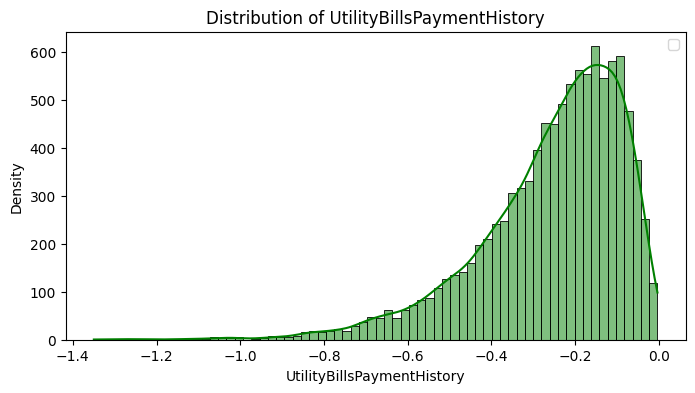

/Users/serzhan/Coding/Python/.venv/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


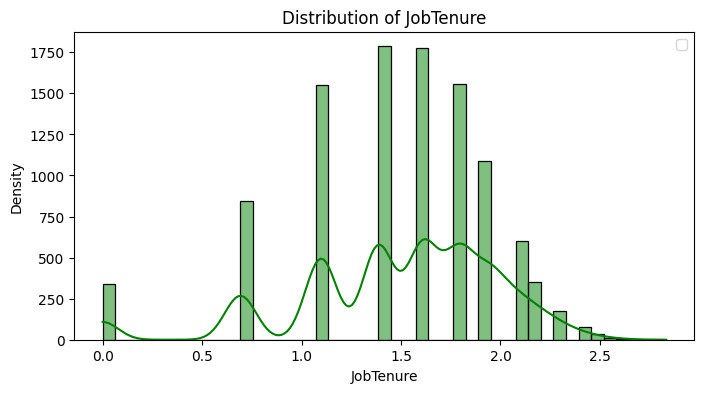

/Users/serzhan/Coding/Python/.venv/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


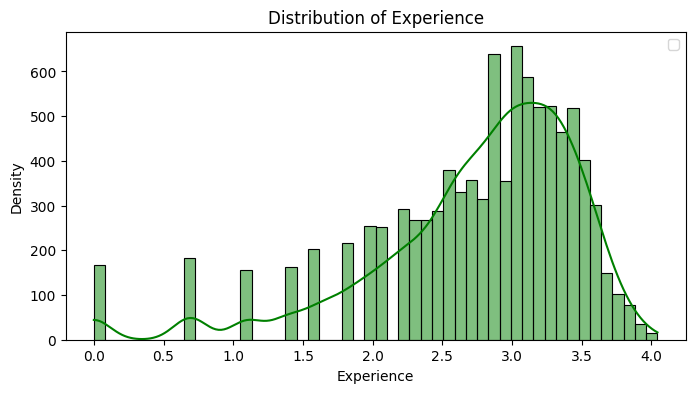

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


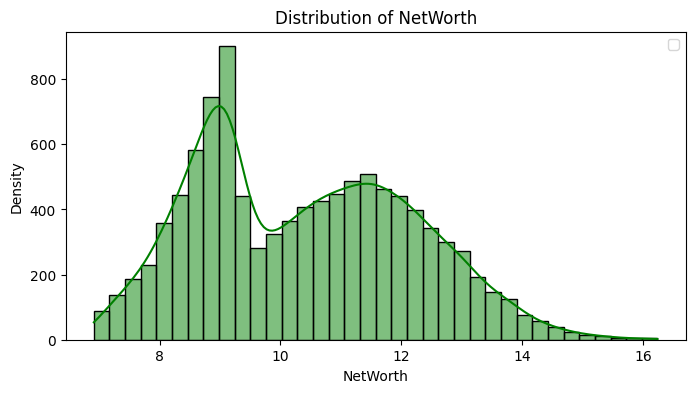

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


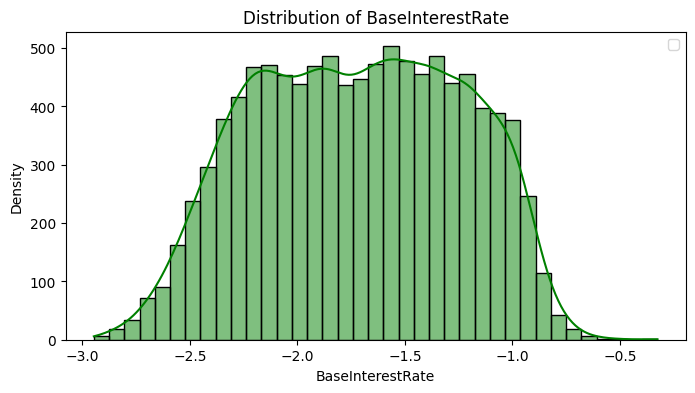

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


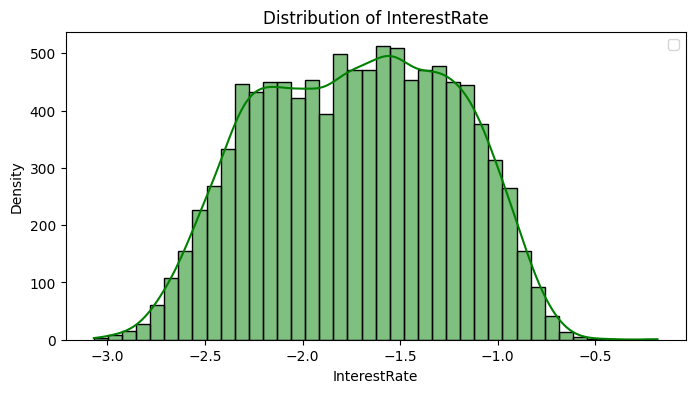

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


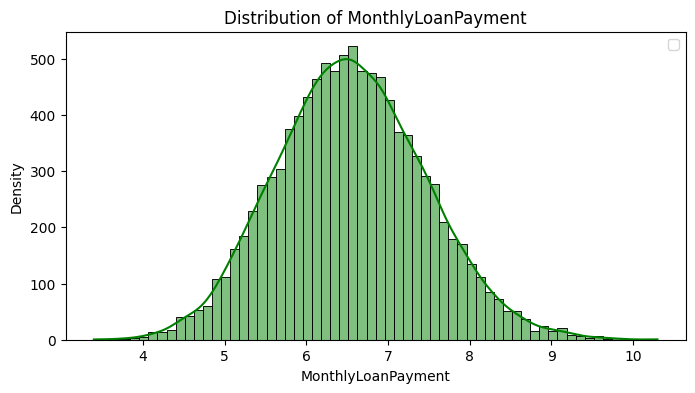

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


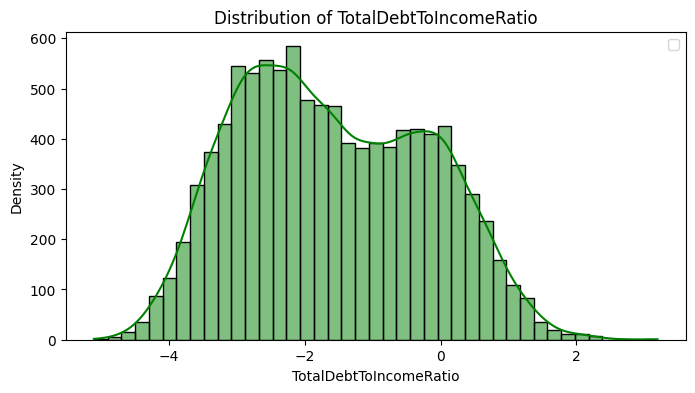

/Users/serzhan/Coding/Python/.venv/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/2114950610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


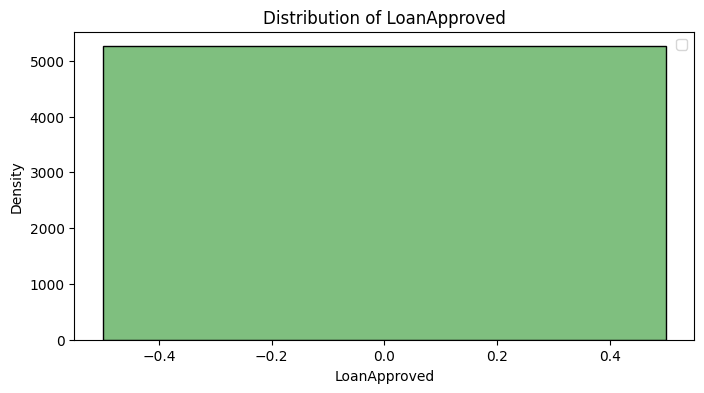

In [16]:
# посмотрим на распределения признаков и отберем непрерывные для логарифмизации
for feature in num_cols[:-1]:
    plt.figure(figsize=(8, 4))  # Создаем новую фигуру
    
    sns.histplot(np.log(data[feature]), kde=True, color='green')
    # sns.histplot(data[feature], kde=True, color='blue')

    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [17]:
data['Age']
data['AnnualIncome']
data['CreditScore']
data['LoanAmount']
data['MonthlyDebtPayments']
data['CreditCardUtilizationRate']
data['DebtToIncomeRatio']
data['SavingsAccountBalance']
data['CheckingAccountBalance']
data['TotalAssets']
data['TotalLiabilities']
data['BaseInterestRate']
data['InterestRate']
data['NetWorth']
log_columns = ['LoanAmount', 'MonthlyDebtPayments', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyLoanPayment']
log_columns #пока оставим так

['LoanAmount',
 'MonthlyDebtPayments',
 'SavingsAccountBalance',
 'CheckingAccountBalance',
 'TotalAssets',
 'TotalLiabilities',
 'MonthlyLoanPayment']

In [18]:
for col in log_columns: # логарифмируем - тогда у нас получатся распределения близкие к нормальным
    data[col] = np.log(data[col])

/var/folders/2g/6wqxq_t16xq8vn_y1dbl0k980000gn/T/ipykernel_79401/1803387484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = np.log(data[col])


In [19]:
from sklearn.preprocessing import StandardScaler #нормализация данных - используется Z-нормализация, которые приводит данные к распределению со средним 0 и отклонением 1
scaler = StandardScaler()
numerical_data = data[num_cols[:-1]]
numerical_data = scaler.fit_transform(numerical_data)
numerical_data = pd.DataFrame(numerical_data, columns=num_cols[:-1])


In [20]:
numerical_data = numerical_data.reset_index(drop=True)
categorical_data = one_hot_df.reset_index(drop=True)

result_data = pd.concat([numerical_data, categorical_data], axis=1) #объединяем два датесета с преобразованными категориальными и скалярными признаками
result_data

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,-1.108451,-0.558650,-0.741546,-0.312090,0.268131,-0.400573,1.273820,-0.831696,-0.591929,0.022255,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.304533,0.350659,0.986774,-0.403305,-0.710632,-0.400573,-0.824384,-0.682975,-0.016743,-0.989281,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.959821,1.454535,0.986774,0.718761,-0.710632,-1.105987,0.387099,1.003963,-0.016743,-0.989281,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.280807,-0.836197,0.969549,-0.177821,-0.221251,-1.105987,-1.233945,-0.602935,2.284003,-0.989281,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.304533,1.454535,0.986774,0.417666,-0.221251,0.304842,0.423902,-0.069843,-0.016743,0.022255,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,-0.074315,1.454535,0.986774,-1.352384,0.757512,2.421084,-0.482200,-0.435536,-0.591929,0.022255,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10268,1.476889,1.454535,0.986774,-0.516589,-0.221251,0.304842,0.549054,1.211837,-1.167115,2.045329,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10269,-1.022273,-1.006139,-2.171286,1.092826,1.736274,-0.400573,0.696393,0.238311,-0.591929,-0.989281,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10270,-1.453163,-1.006139,-2.159802,0.429777,0.757512,1.010256,0.031372,1.333035,-0.591929,-0.989281,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
for feature in log_columns: # Я тут возвел те же признаки в квадрат, помогло - илья олегович говорил как-то на лекции
    squared_feature = f'{feature}_squared'
    result_data[squared_feature] = result_data[feature] ** 2

In [22]:
correlation = pd.concat([result_data[num_cols[:-1]], data['RiskScore']], axis=1).corr()
correlation['RiskScore'].sort_values(ascending=False)

RiskScore                     1.000000
AnnualIncome                  0.021954
LoanApproved                  0.020694
MonthlyIncome                 0.019937
CreditScore                   0.018099
Experience                    0.012315
BankruptcyHistory             0.009464
LengthOfCreditHistory         0.009230
NumberOfCreditInquiries       0.007821
Age                           0.007517
NumberOfDependents            0.007437
LoanAmount                    0.006368
CreditCardUtilizationRate     0.003413
UtilityBillsPaymentHistory    0.002939
PreviousLoanDefaults          0.002622
MonthlyDebtPayments           0.002529
LoanDuration                  0.002244
TotalAssets                   0.002060
MonthlyLoanPayment            0.001132
NetWorth                     -0.001977
DebtToIncomeRatio            -0.004288
JobTenure                    -0.004654
PaymentHistory               -0.005268
TotalLiabilities             -0.007612
NumberOfOpenCreditLines      -0.009433
TotalDebtToIncomeRatio   

избавимся от сильно коррелируемых признаков - для этого  пройдемся по диагональной матрице и удалим встреченный столбец из выборки

In [23]:
corr_matrix = result_data.corr().abs() 

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

result_data.drop(to_drop, axis=1, inplace=True)

non_cor_features = result_data.columns.to_list()
result_data

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,LoanAmount_squared,MonthlyDebtPayments_squared,SavingsAccountBalance_squared,CheckingAccountBalance_squared,TotalAssets_squared,TotalLiabilities_squared,MonthlyLoanPayment_squared
0,-1.108451,-0.558650,-0.741546,-0.312090,0.268131,-0.400573,1.273820,-0.831696,-0.591929,0.022255,...,0.0,0.0,0.0,0.097400,1.622618,0.020771,1.975970,0.038560,0.064898,0.122556
1,1.304533,0.350659,0.986774,-0.403305,-0.710632,-0.400573,-0.824384,-0.682975,-0.016743,-0.989281,...,0.0,1.0,0.0,0.162655,0.679609,1.304747,0.198641,0.058314,0.516026,0.114116
2,0.959821,1.454535,0.986774,0.718761,-0.710632,-1.105987,0.387099,1.003963,-0.016743,-0.989281,...,0.0,0.0,0.0,0.516617,0.149846,1.739236,0.255155,1.158419,0.092862,0.428790
3,-1.280807,-0.836197,0.969549,-0.177821,-0.221251,-1.105987,-1.233945,-0.602935,2.284003,-0.989281,...,0.0,1.0,0.0,0.031620,1.522621,0.368092,0.487162,1.357749,1.344564,0.139089
4,1.304533,1.454535,0.986774,0.417666,-0.221251,0.304842,0.423902,-0.069843,-0.016743,0.022255,...,0.0,0.0,0.0,0.174445,0.179693,0.138900,4.066461,0.239483,3.391457,0.007299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,-0.074315,1.454535,0.986774,-1.352384,0.757512,2.421084,-0.482200,-0.435536,-0.591929,0.022255,...,0.0,0.0,0.0,1.828942,0.232517,1.513235,0.197450,0.000261,0.235337,2.963419
10268,1.476889,1.454535,0.986774,-0.516589,-0.221251,0.304842,0.549054,1.211837,-1.167115,2.045329,...,0.0,0.0,0.0,0.266865,0.301460,0.110111,0.099814,0.459381,5.336975,0.455904
10269,-1.022273,-1.006139,-2.171286,1.092826,1.736274,-0.400573,0.696393,0.238311,-0.591929,-0.989281,...,0.0,0.0,0.0,1.194268,0.484963,0.128075,1.312150,0.181306,2.834711,1.073126
10270,-1.453163,-1.006139,-2.159802,0.429777,0.757512,1.010256,0.031372,1.333035,-0.591929,-0.989281,...,0.0,0.0,0.0,0.184708,0.000984,0.072398,0.094236,0.952837,1.437328,0.197583


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

обучим линейную модель с l1 регуляриацией и кросс-валидацией 
подберем параметры модели через поиск по сетке

In [25]:
y = data['RiskScore']
X = result_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

param_grid = {
    'eps' : [0.001, 0.0001, 0.01, 0.1, 0.05],
    'selection' : ['cyclic', 'random'],
}
lasso = LassoCV(fit_intercept=True)
gr_search = GridSearchCV(lasso, param_grid, cv = 10)

gr_search.fit(X_train, y_train)

best_lasso = gr_search.best_estimator_

print("MSE: ", mean_squared_error(best_lasso.predict(X_test), y_test))
print("Mean R2 score", cross_val_score(best_lasso, X, y, cv=10, scoring="r2").mean())

print("Best params: ", gr_search.best_params_)

MSE:  18.16656611814629
Mean R2 score 0.9376698069626468
Best params:  {'eps': 0.001, 'selection': 'random'}


In [26]:
lasso_coef = np.nonzero(best_lasso.coef_)#отбираем признаки с ненулевыми коэфициентами

lasso_features = result_data.columns[lasso_coef]
lasso_features

Index(['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration',
       'MonthlyDebtPayments', 'CreditCardUtilizationRate',
       'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
       'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults',
       'LengthOfCreditHistory', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'UtilityBillsPaymentHistory', 'JobTenure',
       'NetWorth', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio',
       'LoanApproved', 'HomeOwnershipStatus_Mortgage',
       'HomeOwnershipStatus_Other', 'HomeOwnershipStatus_Own',
       'HomeOwnershipStatus_Rent', 'LoanPurpose_Education',
       'EmploymentStatus_Employed', 'EmploymentStatus_Self-Employed',
       'EducationLevel_Associate', 'EducationLevel_High School',
       'LoanAmount_squared', 'MonthlyDebtPayments_squared',
       'SavingsAccountBalance_squared', 'CheckingAccountBalance_squared',
       'TotalAssets_squared', 'TotalLiabilities_squared',
       'MonthlyLo

перед тем как предсказывать значение по тестовой выборке, необходимо выполнить те же преобразования, что и в обучающей

In [27]:
test_data = pd.read_csv('test.csv', index_col="ID")
test_data

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
ID,,,,,,,,,,,,,,,,,,,,,
0,1979-01-03,49,207095,850,14458,60,Single,0,Rent,376,...,6,Employed,High School,23,10626,0.104458,0.125350,325.532336,0.040650,1
1,2006-04-10,28,64653,674,65491,48,Single,2,Own,238,...,3,Employed,High School,3,299024,0.233491,0.260561,2210.247757,0.454410,0
2,2013-11-28,41,300000,768,16811,60,Single,1,Own,469,...,3,Employed,High School,19,6979,0.147811,0.154571,403.977431,0.034919,1
3,1995-08-24,50,300000,850,48737,36,Divorced,0,Mortgage,567,...,3,Self-Employed,Bachelor,26,8438,0.118737,0.099712,1571.946906,0.085558,1
4,1980-06-15,35,300000,672,51916,60,Single,6,Mortgage,106,...,7,Employed,Associate,12,436216,0.230916,0.237727,1486.675235,0.063707,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1993-03-19,40,300000,850,12696,60,Married,1,Other,434,...,3,Self-Employed,Master,19,10957,0.102696,0.094445,266.295150,0.028012,1
4996,2015-09-27,39,75014,572,49380,48,Married,0,Mortgage,97,...,3,Employed,Master,16,7587,0.268380,0.302377,1784.809960,0.301033,0
4997,1993-10-04,43,15000,454,32810,72,Divorced,1,Other,289,...,6,Employed,Bachelor,17,403922,0.330810,0.283165,951.731011,0.992585,0


In [28]:
for col in log_columns:
    test_data[col] = np.log(test_data[col])

In [29]:
test_encoder_data = encoder.fit_transform(test_data[categorical_cols[1:]])
one_hot_df = pd.DataFrame(test_encoder_data, columns= encoder.get_feature_names_out(categorical_cols[1:]))
one_hot_df

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,...,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4997,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4998,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
numerical_data = test_data[num_cols[:-1]]
numerical_data = scaler.fit_transform(numerical_data)
num_df = pd.DataFrame(numerical_data, columns=num_cols[:-1])


In [31]:
learning_data = pd.concat([num_df,one_hot_df], axis=1)

learning_data

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,0.787875,0.638663,0.971893,-0.527762,0.267179,-1.071670,-0.066863,-1.300770,-0.556629,-0.998301,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.009910,-0.596647,-0.025652,1.356962,-0.222878,0.328657,-0.638839,-1.320560,0.589170,1.001902,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.103005,1.444370,0.507128,-0.339640,0.267179,-0.371507,0.209562,0.298636,1.162069,-0.998301,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.873484,1.444370,0.971893,0.988325,-0.712935,-1.071670,0.446893,1.639138,-0.556629,0.001800,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.410648,1.444370,-0.036987,1.067160,0.267179,3.129310,-1.650457,0.956348,-1.702428,-0.998301,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.017396,1.444370,0.971893,-0.689903,0.267179,-0.371507,0.112558,-1.392589,1.162069,0.001800,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,-0.068213,-0.506793,-0.603774,1.004678,-0.222878,-1.071670,-1.761431,-1.426408,-0.556629,0.001800,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4997,0.274222,-1.027257,-1.272583,0.494638,0.757237,-0.371507,-0.396005,0.752251,-0.556629,-0.998301,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4998,1.130310,-0.303400,0.971893,0.316572,1.737351,-0.371507,-0.777641,-0.921494,-1.129529,0.001800,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
for col in log_columns:
    new_col = f'{col}_squared'
    learning_data[new_col] = learning_data[col] ** 2

In [34]:
y_pred = best_lasso.predict(learning_data[result_data.columns])
y_pred

array([34.42843223, 55.33803632, 31.55203159, ..., 61.16527851,
       53.03325146, 84.3212911 ])

In [35]:
data_set = pd.DataFrame(y_pred, index=test_data.index, columns=['RiskScore']) # создадим датасет из предсказанных значений
data_set

,RiskScore
ID,
0,34.428432
1,55.338036
2,31.552032
3,35.267462
4,32.515163
...,...
4995,34.781754
4996,60.841742
4997,61.165279


In [36]:
data_set.to_csv('ex.csv') #сохранение в файл